In [188]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
info = pd.read_csv("E:/dasein_py/Data Analysis/招商银行/特征说明.csv", index_col =0, header =1)
df1 = pd.read_csv("E:/dasein_py/Data Analysis/招商银行/train.csv", index_col = 1, header =0)
df2 = pd.read_csv("E:/dasein_py/Data Analysis/招商银行/test_A榜.csv", index_col = 1, header =0)

In [189]:
df1.shape, df2.shape

((40000, 50), (12000, 49))

In [190]:
info.shape

(52, 1)

In [191]:
quantitive = [i for i in info.index if info.loc[i,:].values[0] == '数值型' and i in df1.columns and i != 'CUST_UID']
quanlitive = [i for i in info.index if info.loc[i,:].values[0] == '字符型' and i in df1.columns and i != 'CUST_UID']

In [192]:
df1.duplicated().sum()

0

In [193]:
df2.duplicated().sum()

0

In [194]:
df1.reset_index(inplace =True)
df2.reset_index(inplace =True)

In [195]:
df1.drop(columns ='CUST_UID', inplace = True)
df2.drop(columns ='CUST_UID', inplace = True)
df1.head()

,LABEL,AGN_CNT_RCT_12_MON,ICO_CUR_MON_ACM_TRX_TM,NB_RCT_3_MON_LGN_TMS_AGV,AGN_CUR_YEAR_AMT,AGN_CUR_YEAR_WAG_AMT,AGN_AGR_LATEST_AGN_AMT,ICO_CUR_MON_ACM_TRX_AMT,COUNTER_CUR_YEAR_CNT_AMT,PUB_TO_PRV_TRX_AMT_CUR_YEAR,...,WTHR_OPN_ONL_ICO,EMP_NBR,REG_CPT,SHH_BCK,HLD_DMS_CCY_ACT_NBR,REG_DT,LGP_HLD_CARD_LVL,OPN_TM,NB_CTC_HLD_IDV_AIO_CARD_SITU,HLD_FGN_CCY_ACT_NBR
0,0,?,72,425.3,?,?,?,25879985.3,2,660732,...,B,2,1200000002,32,12,1708.45,?,416.84,?,2
1,0,2282,222,?,11776572.4,?,1964626.4,14755499.8,2,126608.3,...,B,1002,5000002,32,22,199.42,F,195.87,D,2
2,0,?,2,?,?,?,4599822.3,2,2,2,...,B,2,?,2,12,1135.55,F,1122,NaN,2
3,1,?,?,22,?,?,?,?,2,2,...,A,2,500002,12,12,98.45,NaN,92,C,2
4,1,?,?,?,?,?,?,?,?,?,...,A,2,?,2,12,?,NaN,355.87,C,2


In [196]:
[df1[quantitive[i]].replace("?", df1[quantitive[i]][df1[quantitive[i]]!='?'].median(), inplace= True) for i in range(len(quantitive))]
[df2[quantitive[i]].replace("?", df2[quantitive[i]][df2[quantitive[i]]!='?'].median(), inplace= True) for i in range(1,len(quantitive))]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [197]:
df1.isnull().any().sum(),df2.isnull().any().sum()

(4, 4)

In [198]:
df1[quantitive] = df1[quantitive].fillna(df1[quantitive].median())
df2[quantitive[1:]] = df2[quantitive[1:]].fillna(df2[quantitive[1:]].median())

In [199]:
df1[quanlitive] = df1[quanlitive].fillna(df1[quanlitive].mode())
df2[quanlitive] = df2[quanlitive].fillna(df2[quanlitive].mode())

- 删除缺失值比例大于50%的变量，填充空值逻辑上不合理。
- 缺失比率小的直接填充。
- 30%以上要研究和LABEL的关系
1. 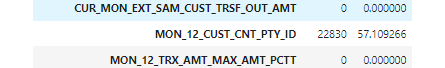
2. 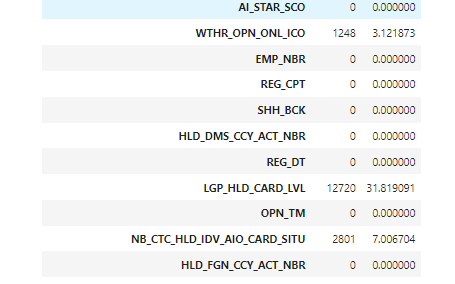

In [200]:
df1.drop(columns ='MON_12_CUST_CNT_PTY_ID', inplace = True)
df2.drop(columns ='MON_12_CUST_CNT_PTY_ID', inplace = True)
df1.shape

(40000, 49)

In [201]:
quanlitive.remove('MON_12_CUST_CNT_PTY_ID')

In [202]:
df1.isnull().sum()

LABEL                                          0
AGN_CNT_RCT_12_MON                             0
ICO_CUR_MON_ACM_TRX_TM                         0
NB_RCT_3_MON_LGN_TMS_AGV                       0
AGN_CUR_YEAR_AMT                               0
AGN_CUR_YEAR_WAG_AMT                           0
AGN_AGR_LATEST_AGN_AMT                         0
ICO_CUR_MON_ACM_TRX_AMT                        0
COUNTER_CUR_YEAR_CNT_AMT                       0
PUB_TO_PRV_TRX_AMT_CUR_YEAR                    0
MON_12_EXT_SAM_TRSF_IN_AMT                     0
MON_12_EXT_SAM_TRSF_OUT_AMT                    0
MON_12_EXT_SAM_NM_TRSF_OUT_CNT                 0
MON_12_EXT_SAM_AMT                             0
CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT               0
CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT              0
MON_12_TRX_AMT_MAX_AMT_PCTT                    0
CUR_YEAR_MON_AGV_TRX_CNT                       0
MON_12_AGV_TRX_CNT                             0
MON_12_ACM_ENTR_ACT_CNT                        0
MON_12_AGV_ENTR_ACT_

In [203]:
df2.isnull().sum()

AGN_CNT_RCT_12_MON                            0
ICO_CUR_MON_ACM_TRX_TM                        0
NB_RCT_3_MON_LGN_TMS_AGV                      0
AGN_CUR_YEAR_AMT                              0
AGN_CUR_YEAR_WAG_AMT                          0
AGN_AGR_LATEST_AGN_AMT                        0
ICO_CUR_MON_ACM_TRX_AMT                       0
COUNTER_CUR_YEAR_CNT_AMT                      0
PUB_TO_PRV_TRX_AMT_CUR_YEAR                   0
MON_12_EXT_SAM_TRSF_IN_AMT                    0
MON_12_EXT_SAM_TRSF_OUT_AMT                   0
MON_12_EXT_SAM_NM_TRSF_OUT_CNT                0
MON_12_EXT_SAM_AMT                            0
CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT              0
CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT             0
MON_12_TRX_AMT_MAX_AMT_PCTT                   0
CUR_YEAR_MON_AGV_TRX_CNT                      0
MON_12_AGV_TRX_CNT                            0
MON_12_ACM_ENTR_ACT_CNT                       0
MON_12_AGV_ENTR_ACT_CNT                       0
MON_12_ACM_LVE_ACT_CNT                  

- WTHR_OPN_ONL_ICO, LGP_HLD_CARD_LVL,NB_CTC_HLD_IDV_AIO_CARD_SITU 字符型直接因子处理

In [204]:
df1[quanlitive] = df1[quanlitive].apply(lambda x:pd.factorize(x)[0]) #转换成因子
df2[quanlitive] = df2[quanlitive].apply(lambda x:pd.factorize(x)[0]) #转换成因子

In [205]:
[df2.replace("?", df2[quantitive[i]][df2[quantitive[i]]!='?'].median(), inplace= True) for i in range(len(quantitive))]
[df1.replace("?", df1[quantitive[i]][df1[quantitive[i]]!='?'].median(), inplace= True) for i in range(len(quantitive))]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [127]:
quantitive

['AGN_CNT_RCT_12_MON',
 'ICO_CUR_MON_ACM_TRX_TM',
 'NB_RCT_3_MON_LGN_TMS_AGV',
 'AGN_CUR_YEAR_AMT',
 'AGN_CUR_YEAR_WAG_AMT',
 'AGN_AGR_LATEST_AGN_AMT',
 'ICO_CUR_MON_ACM_TRX_AMT',
 'COUNTER_CUR_YEAR_CNT_AMT',
 'PUB_TO_PRV_TRX_AMT_CUR_YEAR',
 'MON_12_EXT_SAM_TRSF_IN_AMT',
 'MON_12_EXT_SAM_TRSF_OUT_AMT',
 'MON_12_EXT_SAM_NM_TRSF_OUT_CNT',
 'MON_12_EXT_SAM_AMT',
 'CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT',
 'CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT',
 'MON_12_TRX_AMT_MAX_AMT_PCTT',
 'CUR_YEAR_MON_AGV_TRX_CNT',
 'MON_12_AGV_TRX_CNT',
 'MON_12_ACM_ENTR_ACT_CNT',
 'MON_12_AGV_ENTR_ACT_CNT',
 'MON_12_ACM_LVE_ACT_CNT',
 'MON_12_AGV_LVE_ACT_CNT',
 'CUR_YEAR_PUB_TO_PRV_TRX_PTY_CNT',
 'MON_6_50_UP_ENTR_ACT_CNT',
 'MON_6_50_UP_LVE_ACT_CNT',
 'CUR_YEAR_COUNTER_ENCASH_CNT',
 'MON_12_ACT_OUT_50_UP_CNT_PTY_QTY',
 'MON_12_ACT_IN_50_UP_CNT_PTY_QTY',
 'LAST_12_MON_COR_DPS_TM_PNT_BAL_PEAK_VAL',
 'LAST_12_MON_COR_DPS_DAY_AVG_BAL',
 'CUR_MON_COR_DPS_MON_DAY_AVG_BAL',
 'CUR_YEAR_COR_DMND_DPS_DAY_AVG_BAL',
 'CUR_YEAR_COR_DP

In [206]:
df1= df1.apply(pd.to_numeric)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   LABEL                                    40000 non-null  int64  
 1   AGN_CNT_RCT_12_MON                       40000 non-null  float64
 2   ICO_CUR_MON_ACM_TRX_TM                   40000 non-null  float64
 3   NB_RCT_3_MON_LGN_TMS_AGV                 40000 non-null  float64
 4   AGN_CUR_YEAR_AMT                         40000 non-null  float64
 5   AGN_CUR_YEAR_WAG_AMT                     40000 non-null  float64
 6   AGN_AGR_LATEST_AGN_AMT                   40000 non-null  float64
 7   ICO_CUR_MON_ACM_TRX_AMT                  40000 non-null  float64
 8   COUNTER_CUR_YEAR_CNT_AMT                 40000 non-null  float64
 9   PUB_TO_PRV_TRX_AMT_CUR_YEAR              40000 non-null  float64
 10  MON_12_EXT_SAM_TRSF_IN_AMT               40000

In [207]:
df2= df2.apply(pd.to_numeric)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   AGN_CNT_RCT_12_MON                       12000 non-null  float64
 1   ICO_CUR_MON_ACM_TRX_TM                   12000 non-null  float64
 2   NB_RCT_3_MON_LGN_TMS_AGV                 12000 non-null  float64
 3   AGN_CUR_YEAR_AMT                         12000 non-null  float64
 4   AGN_CUR_YEAR_WAG_AMT                     12000 non-null  float64
 5   AGN_AGR_LATEST_AGN_AMT                   12000 non-null  float64
 6   ICO_CUR_MON_ACM_TRX_AMT                  12000 non-null  float64
 7   COUNTER_CUR_YEAR_CNT_AMT                 12000 non-null  float64
 8   PUB_TO_PRV_TRX_AMT_CUR_YEAR              12000 non-null  float64
 9   MON_12_EXT_SAM_TRSF_IN_AMT               12000 non-null  float64
 10  MON_12_EXT_SAM_TRSF_OUT_AMT              12000

In [208]:
df1_features = df1.iloc[:,1:]

In [209]:
df1_labels = df1.iloc[:,0:1]

In [210]:
df1_features.to_csv('cleaned_features_v3.csv')

In [211]:
df1_labels.to_csv('cleaned_labels_v3.csv')

In [212]:
df2.to_csv('cleaned_test_v3.csv')

In [213]:
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=False)
df2_features = scaler.fit_transform(df2)
df1_features = scaler.fit_transform(df1_features)

### 选出XGB的依据：
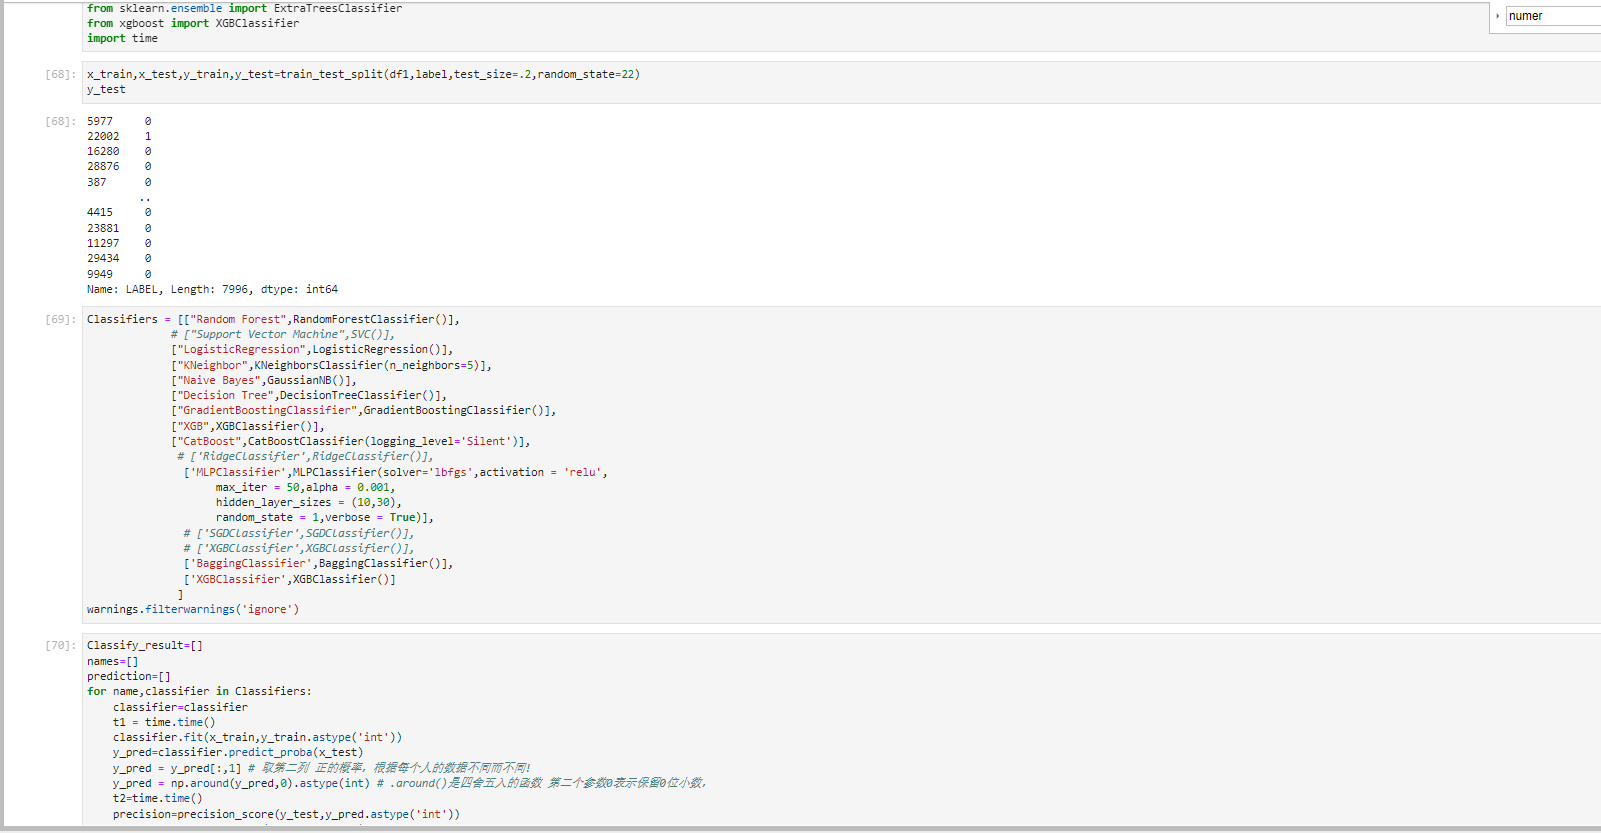
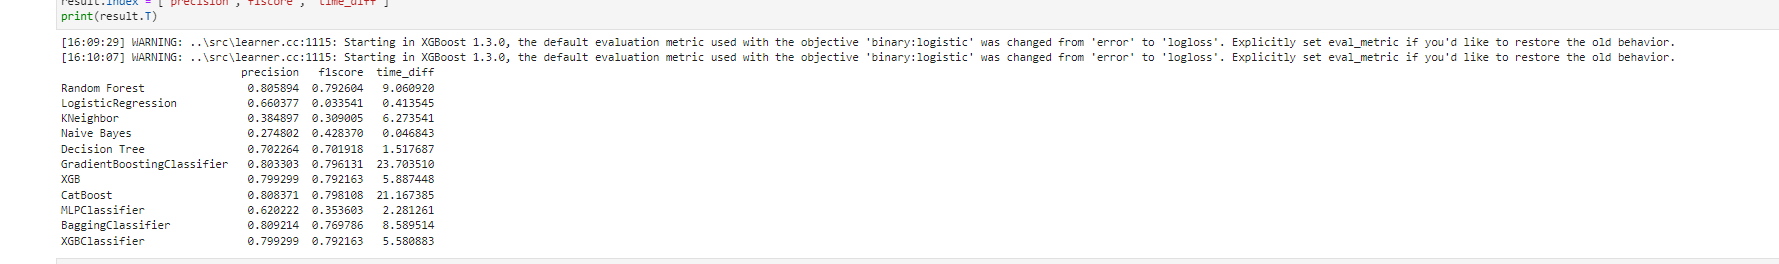

In [337]:
clf = XGBClassifier(learning_rate= 0.05, n_estimators= 300, max_depth= 6, min_child_weight= 5, seed= 0,
                    subsample= 0.9, colsample_bytree= 0.8, gamma= 0, reg_alpha= 5, reg_lambda=0.1, n_jobs = -1)
clf.fit(df1_features,df1_labels)
clf.score(df1_features,df1_labels)

In [216]:
# AUC
from sklearn.metrics import roc_curve, auc
predict_proba = clf.predict_proba(df1_features)
false_positive_rate, true_positive_rate, thresholds = roc_curve(df1_labels, predict_proba[:,1])
auc(false_positive_rate, true_positive_rate)

0.9737980283333333

In [221]:
corr = df1.corr()
var_ = corr.nlargest(30, 'LABEL')['LABEL'].index
# var_ = corr['LABEL'].index
var_

Index(['LABEL', 'AI_STAR_SCO', 'SHH_BCK', 'NB_CTC_HLD_IDV_AIO_CARD_SITU',
       'LGP_HLD_CARD_LVL', 'MON_12_TRX_AMT_MAX_AMT_PCTT',
       'LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV', 'EMP_NBR',
       'LAST_12_MON_MON_AVG_TRX_AMT_NAV', 'CUR_YEAR_MID_BUS_INC',
       'MON_12_EXT_SAM_NM_TRSF_OUT_CNT', 'MON_12_EXT_SAM_AMT',
       'CUR_YEAR_MON_AGV_TRX_CNT', 'MON_12_AGV_LVE_ACT_CNT',
       'MON_12_ACM_LVE_ACT_CNT', 'MON_12_AGV_TRX_CNT',
       'MON_12_AGV_ENTR_ACT_CNT', 'MON_12_ACM_ENTR_ACT_CNT',
       'AGN_CNT_RCT_12_MON', 'WTHR_OPN_ONL_ICO', 'PUB_TO_PRV_TRX_AMT_CUR_YEAR',
       'MON_6_50_UP_LVE_ACT_CNT', 'MON_6_50_UP_ENTR_ACT_CNT',
       'CUR_YEAR_COR_DPS_YEAR_DAY_AVG_INCR', 'AGN_CUR_YEAR_WAG_AMT',
       'AGN_AGR_LATEST_AGN_AMT', 'MON_12_EXT_SAM_TRSF_IN_AMT',
       'ICO_CUR_MON_ACM_TRX_AMT', 'CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT',
       'ICO_CUR_MON_ACM_TRX_TM'],
      dtype='object')

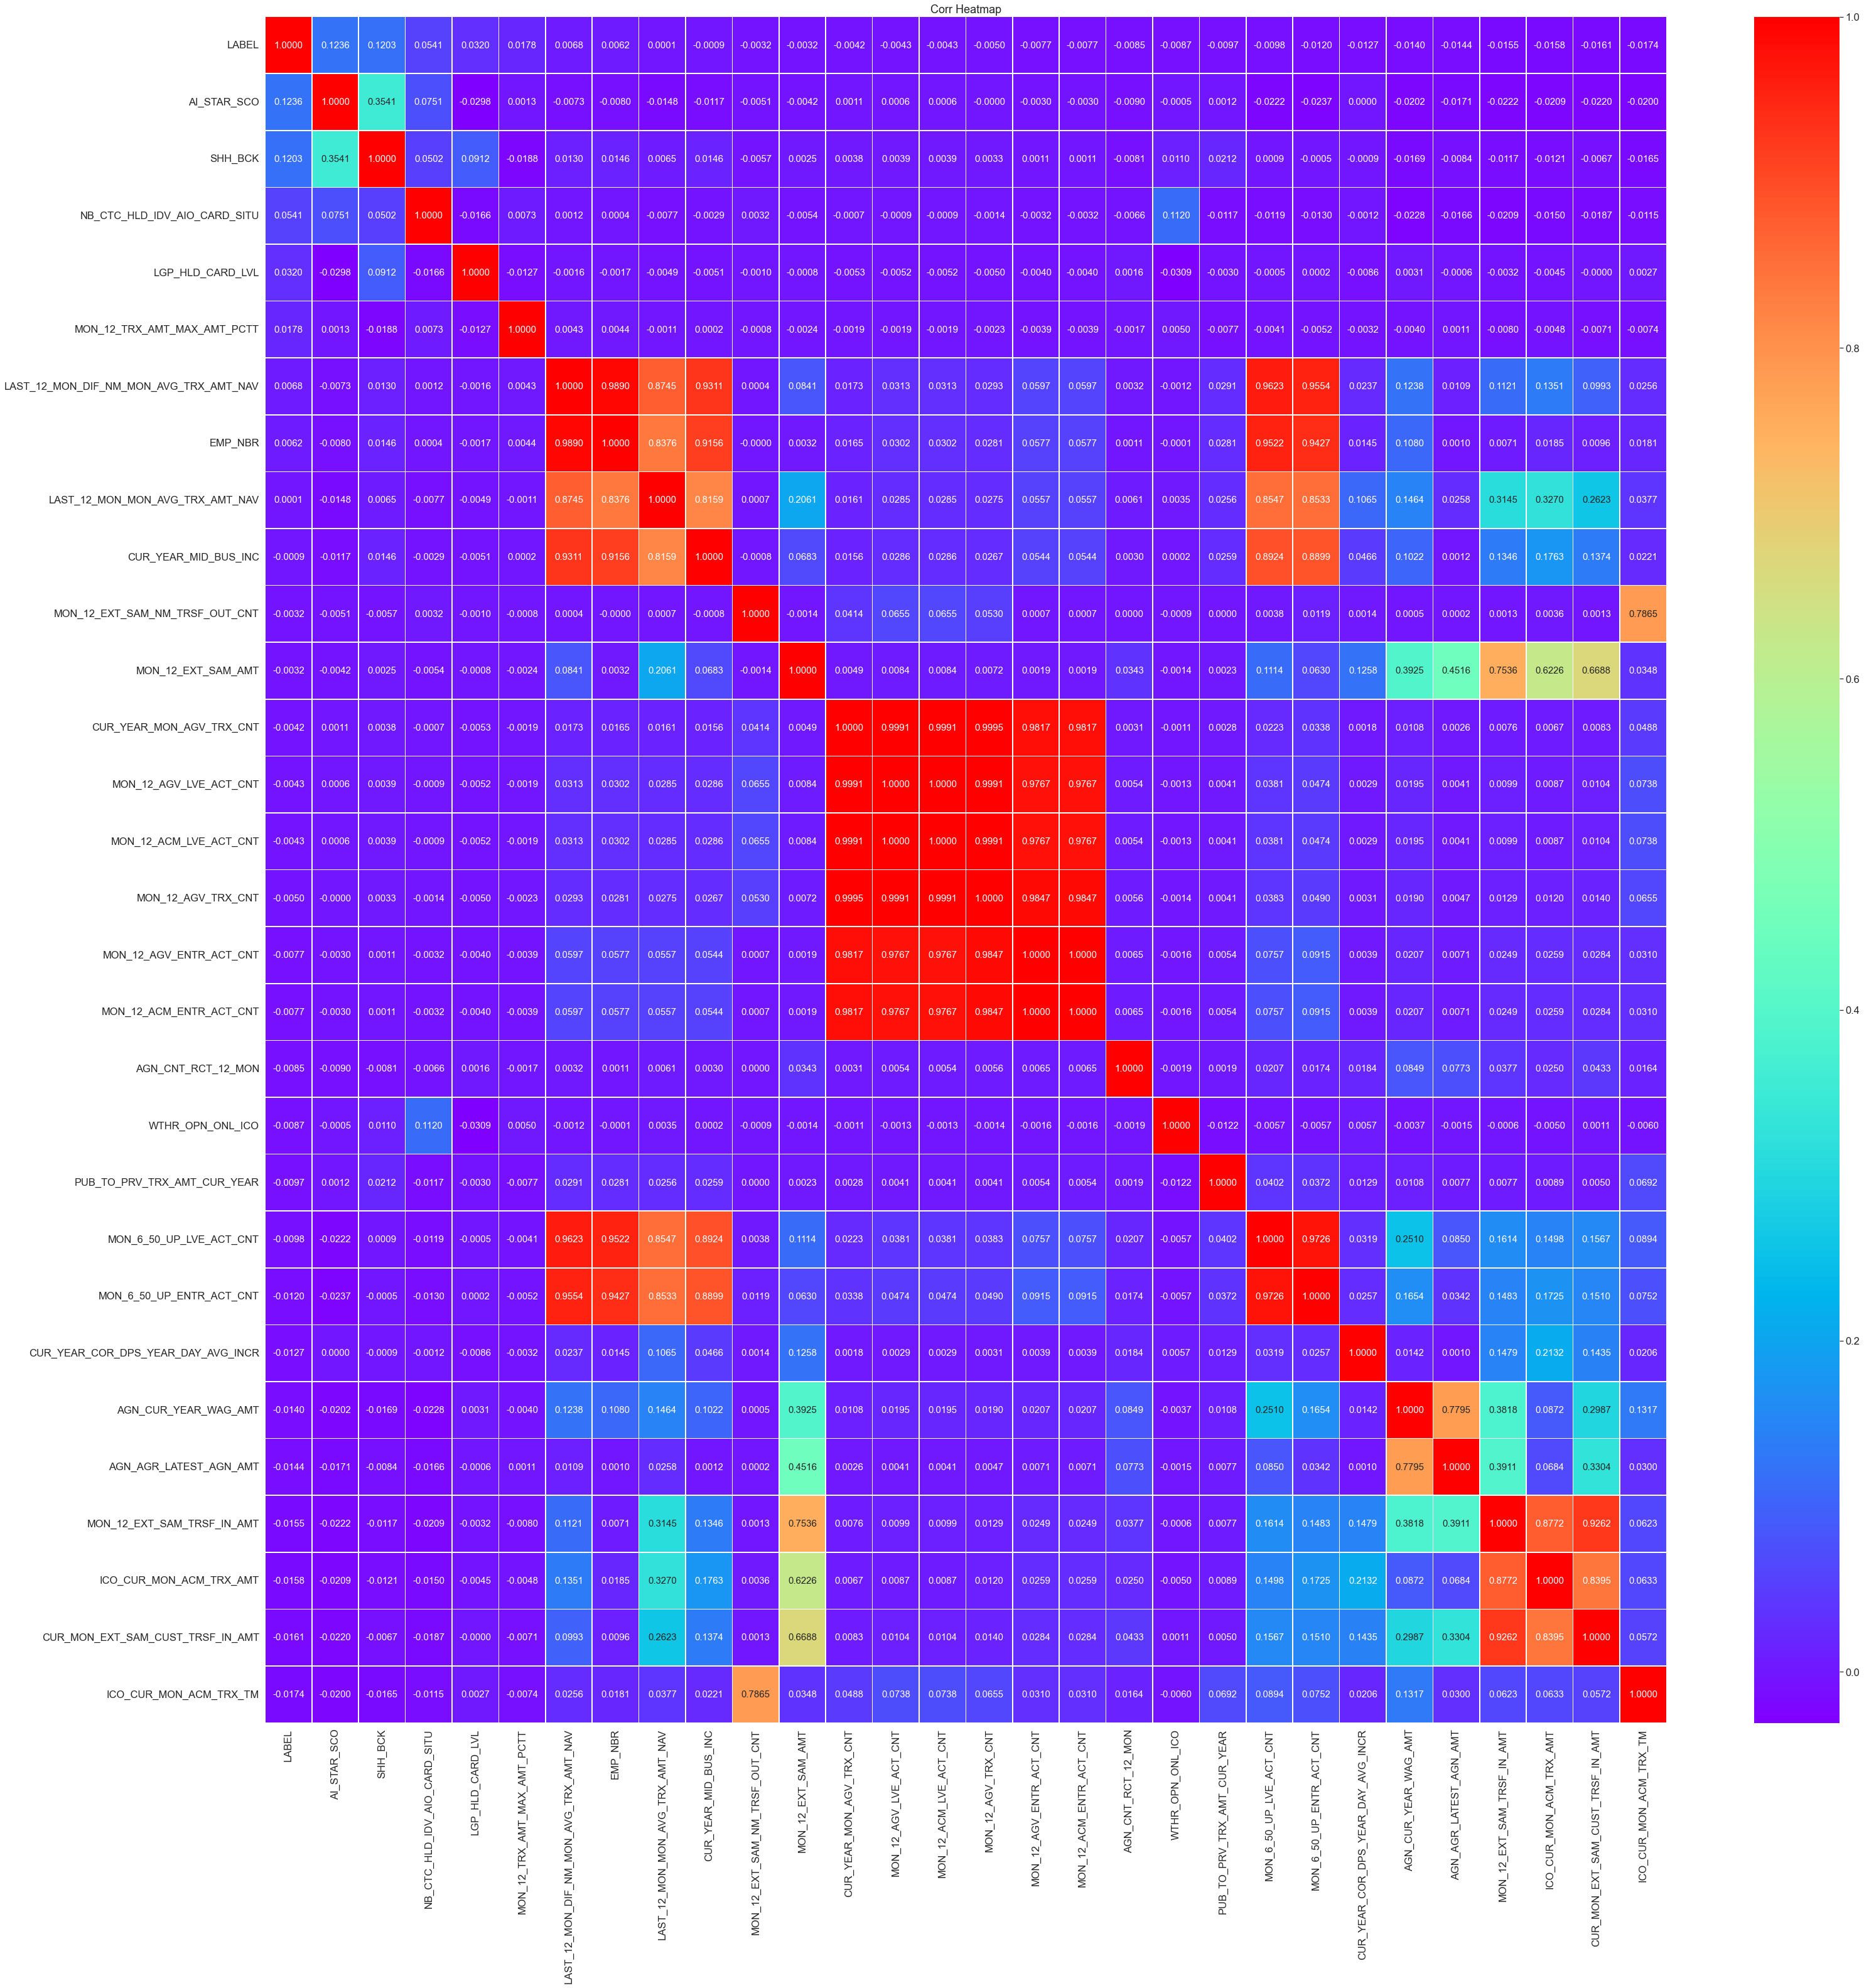

In [222]:
features2 = df1[var_]
corr = features2.corr()
plt.figure(figsize=(50,50))
sns.set(font_scale=1.5)
ax=sns.heatmap(corr,
               xticklabels=corr.columns,
               yticklabels=corr.columns,
               linewidths=0.6,annot=True,
               cbar=True,cmap="rainbow",fmt='.4f',
               annot_kws={'size': 15})
plt.title("Corr Heatmap")
plt.savefig("Corr Heatmap.png",dpi=400)
plt.show()

In [223]:
import seaborn as sns
sns.set(style='darkgrid',font_scale=1.3)
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False
import warnings

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

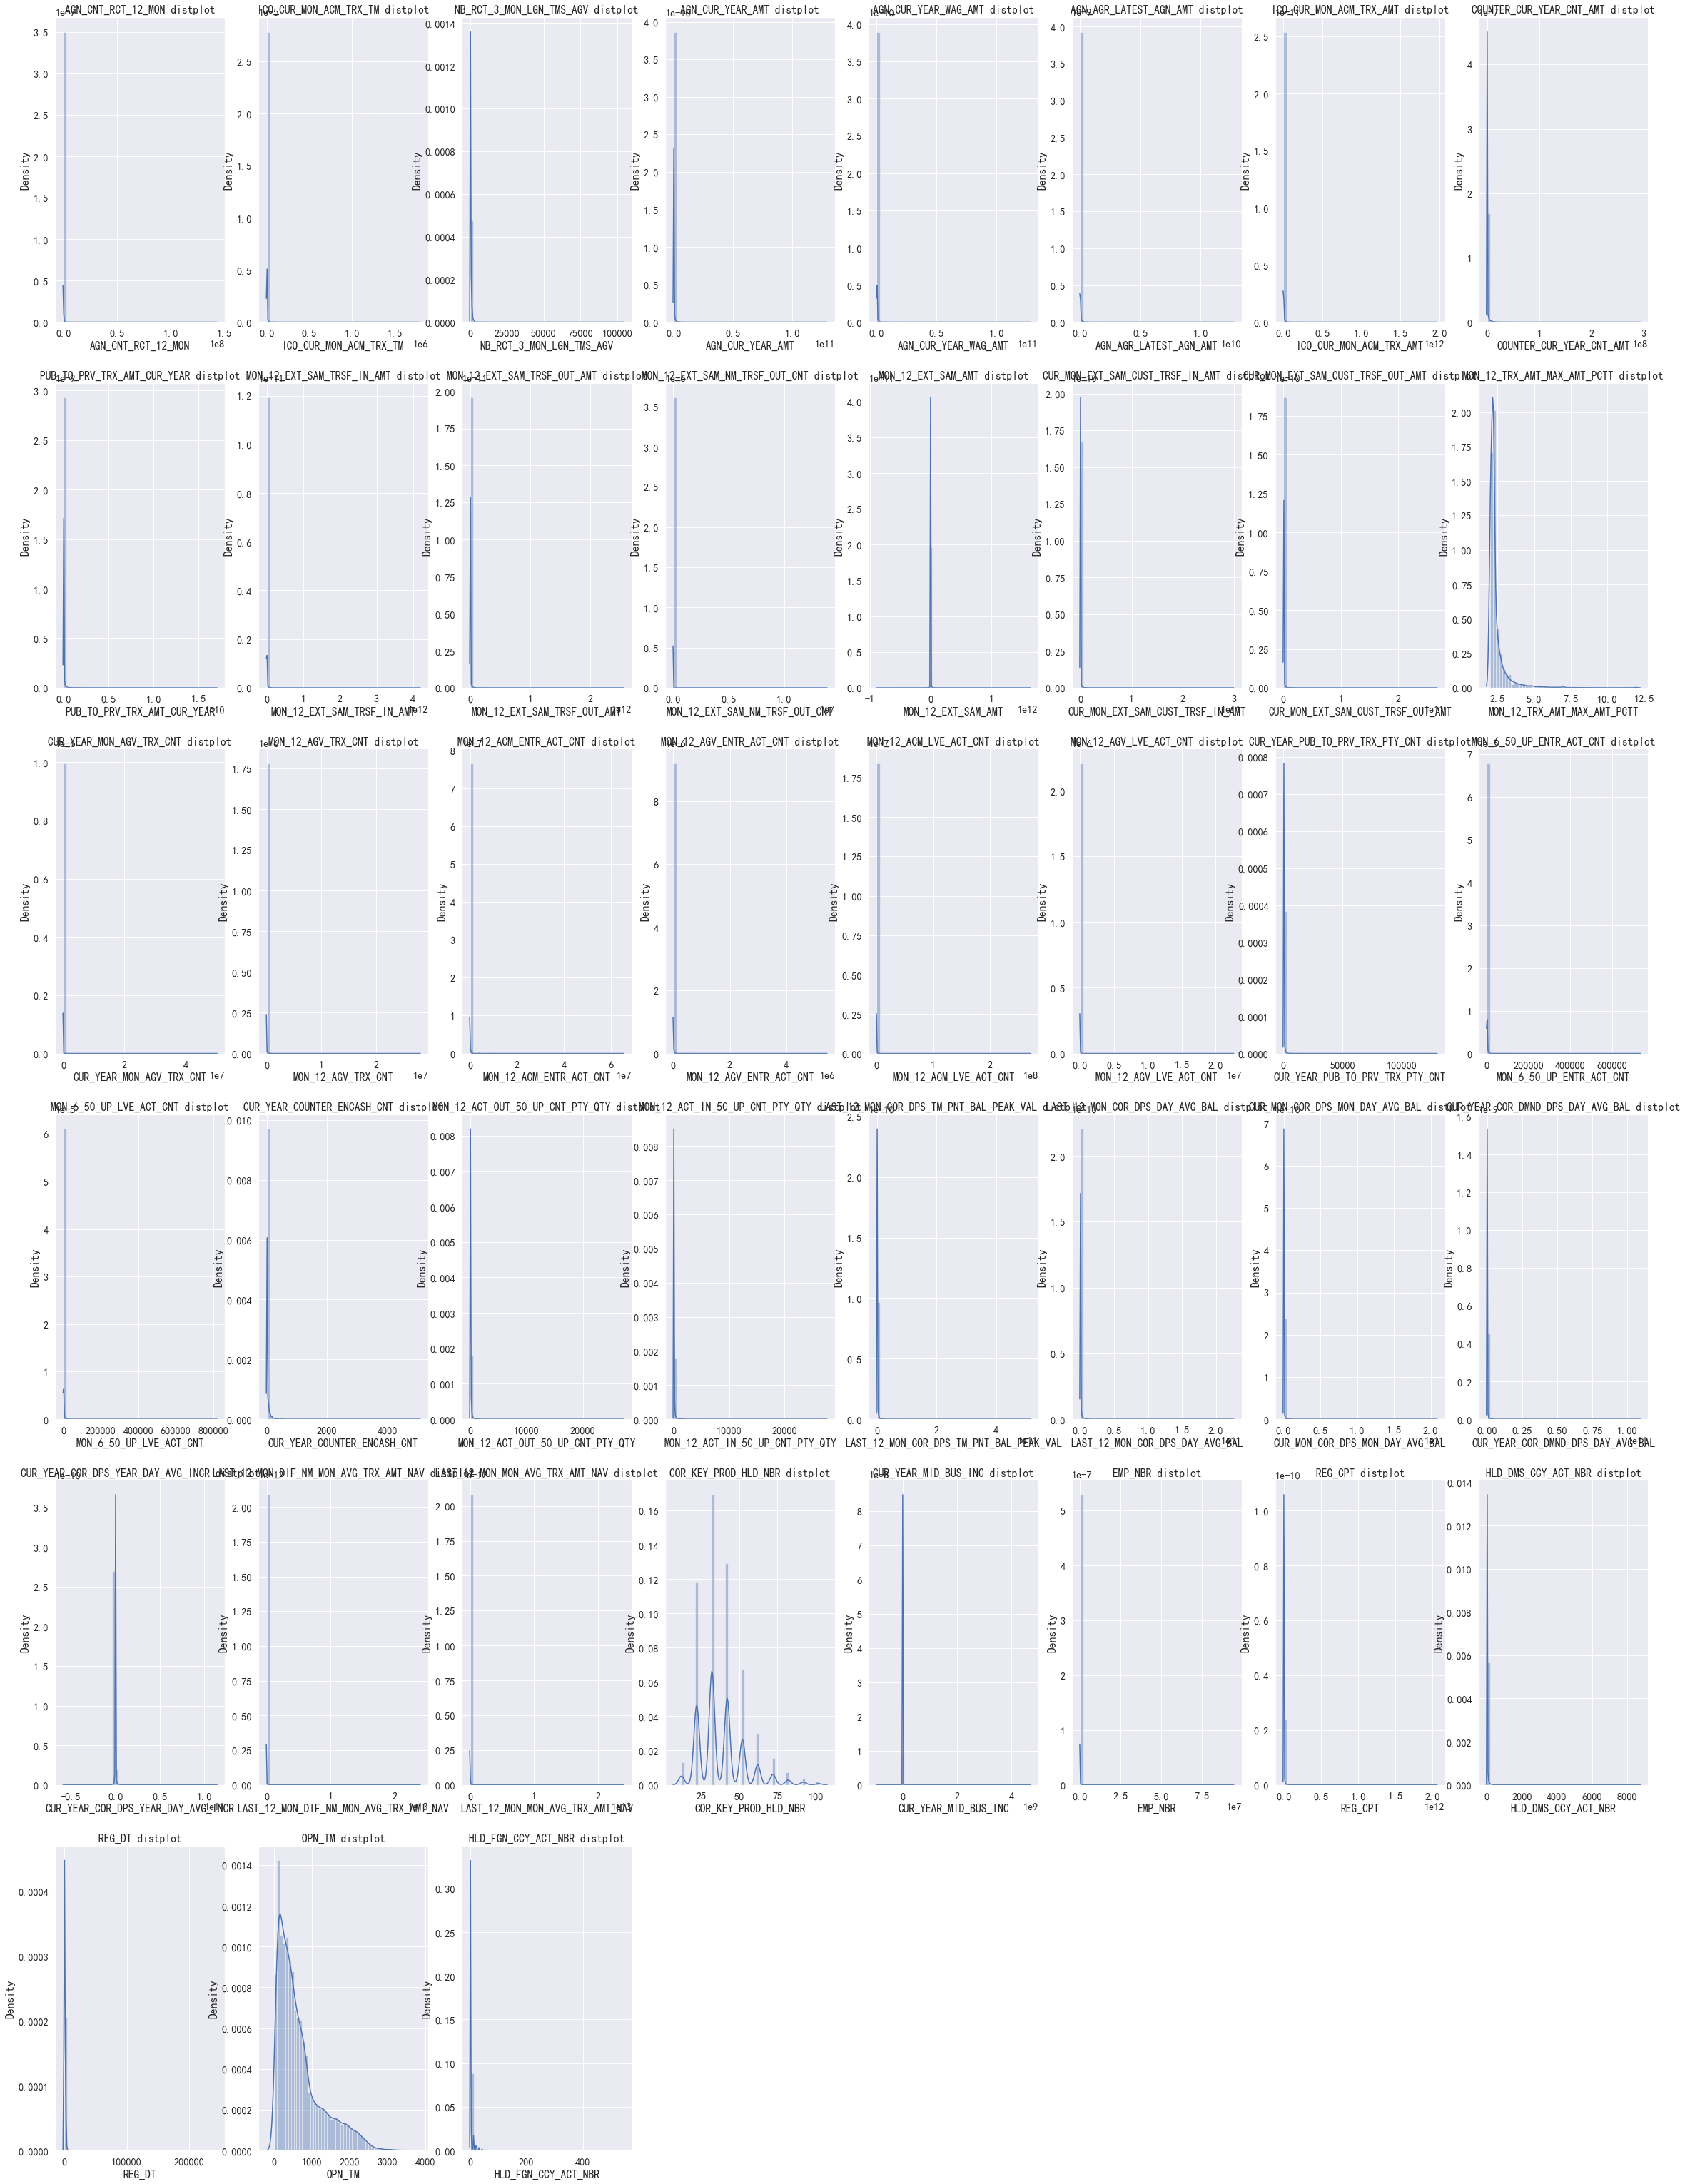

In [230]:
plt.figure(figsize=(40,55))
plt.plot(color='#00338D')
for i in range(len(quantitive)):

    plt.subplot(6,8,i+1)
    plt.title("{} distplot".format(quantitive[i]))
    sns.distplot(df1[quantitive[i]])
plt.show()

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: 

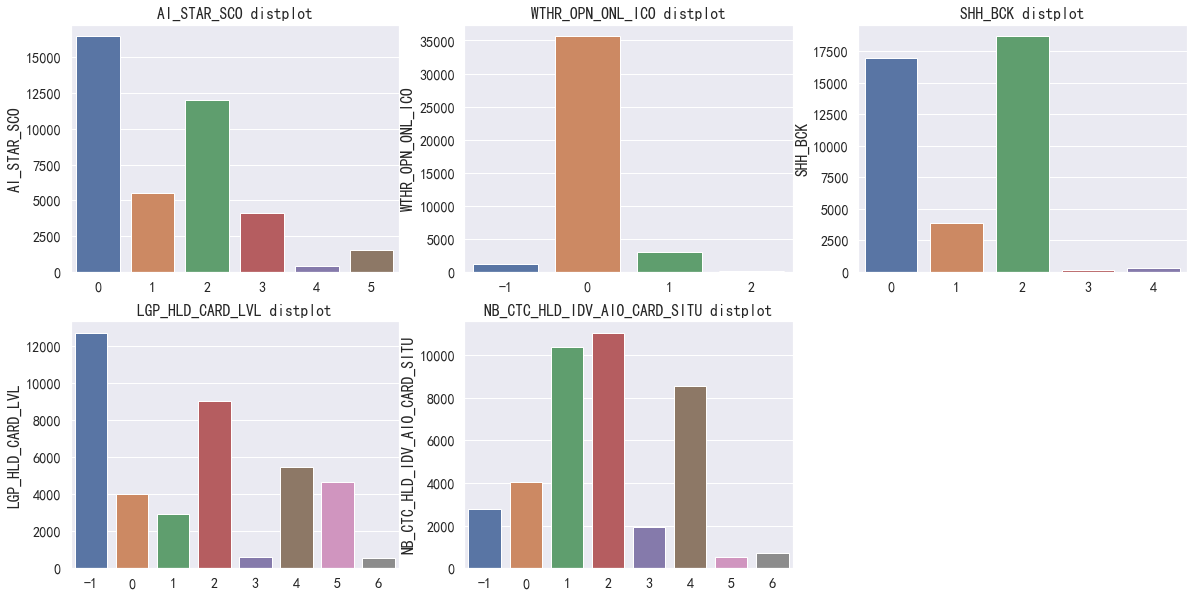

In [232]:
plt.figure(figsize=(20,10))
plt.plot(color='#00338D')
for i in range(len(quanlitive)):

    plt.subplot(2,3,i+1)
    plt.title("{} distplot".format(quanlitive[i]))
    sns.barplot(df1[quanlitive[i]].value_counts().keys(),
               df1[quanlitive[i]].value_counts())
plt.show()

#### 因为做不做特征选择，模型准确率都不变化，所以建立神经网络模型使用深度学习。

In [273]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd
import tensorflow as tf
# from keras.models import Model
# from keras.layers import Input, Dense, Dropout, Activation, Flatten
# from keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Input, Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
# import pandas_ml as pdml
# import imblearn
from sklearn.model_selection import train_test_split #数据集训练集划分
x_train,x_test,y_train,y_test=train_test_split(features2,df1_labels,test_size=.2,random_state=22)
x_train

array([[-0.01771666, -0.04212   , -0.37129334, ...,  0.40428524,
        -0.56876373, -0.23009299],
       [-0.00688675, -0.0193448 ,  0.16976512, ...,  0.08433662,
         0.05141262,  0.94220602],
       [-0.02094347, -0.03511224, -0.13479337, ...,  2.10181475,
         1.29176531, -0.23009299],
       ...,
       [-0.02023717, -0.04124403, -0.18034758, ..., -0.90809348,
         1.29176531, -0.23009299],
       [-0.01771666, -0.04649984, -0.42121202, ..., -1.03955869,
         1.29176531, -0.23009299],
       [-0.01771666, -0.03861612, -0.41671116, ..., -0.07861826,
         1.29176531, -0.23009299]])

In [274]:
model = Sequential()
model.add(Dense(32, input_dim=48, activation='relu'))     # kernel_initializer='normal'
model.add(Dense(1, activation='sigmoid'))                 # kernel_initializer='normal'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                1568      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [275]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 2s 1ms/step - loss: 0.5353 - accuracy: 0.7502
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5126 - accuracy: 0.7532
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5027 - accuracy: 0.7540
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4912 - accuracy: 0.7541
Epoch 5/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4844 - accuracy: 0.7567
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4793 - accuracy: 0.7599
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4737 - accuracy: 0.7615
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4692 - accuracy: 0.7643
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4647 - accuracy: 0.7653
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.459

In [278]:
from sklearn.metrics import classification_report
prediction = model.predict(x_test)
prediction

In [281]:
results = []
for i in range(len(prediction)):
	if prediction[i][0] > 0.5:
		p = 1
	else: 
		p = 0
	results.append(p)

In [282]:
print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      5914
           1       0.74      0.05      0.09      2086

    accuracy                           0.75      8000
   macro avg       0.74      0.52      0.47      8000
weighted avg       0.74      0.75      0.65      8000



In [292]:
predict_proba = model.predict_proba(x_test)
predict_proba = tf.squeeze(predict_proba)

In [294]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_proba)
auc(false_positive_rate, true_positive_rate)

0.8335148392539795

In [285]:
model2 = Sequential()
model2.add(Dense(32, input_dim=48, activation='relu')) 
model2.add(Dense(27, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(15, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                1568      
_________________________________________________________________
dense_7 (Dense)              (None, 27)                891       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                560       
_________________________________________________________________
dense_9 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 16        
Total params: 3,350
Trainable params: 3,350
Non-trainable params: 0
_________________________________________________________________


In [300]:
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 3s 2ms/step - loss: 0.5356 - accuracy: 0.7527
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5076 - accuracy: 0.7527
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4909 - accuracy: 0.7539
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4754 - accuracy: 0.7597
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4567 - accuracy: 0.7674
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4399 - accuracy: 0.7782
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4238 - accuracy: 0.7888
Epoch 8/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4103 - accuracy: 0.7946
Epoch 9/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3981 - accuracy: 0.8042
Epoch 10/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.392

In [303]:
predict_proba = model2.predict_proba(x_test)
predict_proba = tf.squeeze(predict_proba)
predict_proba

D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:429: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<tf.Tensor: shape=(8000,), dtype=float32, numpy=
array([0.23599775, 0.44949496, 0.04248558, ..., 0.4051927 , 0.09996269,
       0.46936077], dtype=float32)>

In [304]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_proba)
auc(false_positive_rate, true_positive_rate)

0.8424366624721034

#### 效果并不理想，继续优化ANN

In [299]:
# 更换损失函数
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
# 调参
epochs_hist = model.fit(x_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1345 - accuracy: 0.8023 - val_loss: 0.1355 - val_accuracy: 0.7884
Epoch 2/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1331 - accuracy: 0.8053 - val_loss: 0.1353 - val_accuracy: 0.7941
Epoch 3/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1324 - accuracy: 0.8055 - val_loss: 0.1340 - val_accuracy: 0.7986
Epoch 4/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1312 - accuracy: 0.8107 - val_loss: 0.1336 - val_accuracy: 0.8062
Epoch 5/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1302 - accuracy: 0.8141 - val_loss: 0.1327 - val_accuracy: 0.8136
Epoch 6/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1293 - accuracy: 0.8152 - val_loss: 0.1329 - val_accuracy: 0.8003
Epoch 7/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1284 - accuracy: 0.8168 - val_loss: 0.1312 - val_accuracy: 0.8116

In [301]:
predict_proba = model.predict_proba(x_test)
predict_proba = tf.squeeze(predict_proba)

D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:429: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [302]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_proba)
auc(false_positive_rate, true_positive_rate)

0.8825675607322728

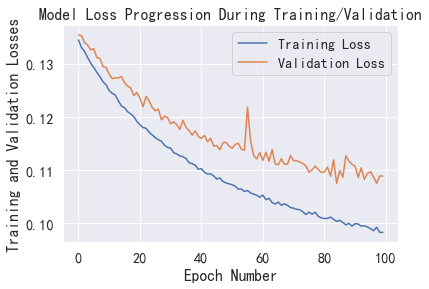

In [305]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [306]:
# 更换损失函数
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
# 调参
epochs_hist2 = model2.fit(x_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/100
512/512 [==============================] - 2s 3ms/step - loss: 0.1214 - accuracy: 0.8213 - val_loss: 0.1260 - val_accuracy: 0.8128
Epoch 2/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1191 - accuracy: 0.8242 - val_loss: 0.1216 - val_accuracy: 0.8178
Epoch 3/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1183 - accuracy: 0.8277 - val_loss: 0.1205 - val_accuracy: 0.8256
Epoch 4/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1160 - accuracy: 0.8320 - val_loss: 0.1206 - val_accuracy: 0.8197
Epoch 5/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1138 - accuracy: 0.8345 - val_loss: 0.1223 - val_accuracy: 0.8211
Epoch 6/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.8357 - val_loss: 0.1174 - val_accuracy: 0.8277
Epoch 7/100
512/512 [==============================] - 1s 2ms/step - loss: 0.1131 - accuracy: 0.8357 - val_loss: 0.1204 - val_accuracy: 0.8213

In [307]:
predict_proba2 = model2.predict_proba(x_test)
predict_proba2 = tf.squeeze(predict_proba2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_proba2)
auc(false_positive_rate, true_positive_rate)

D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:429: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.8764842415303271

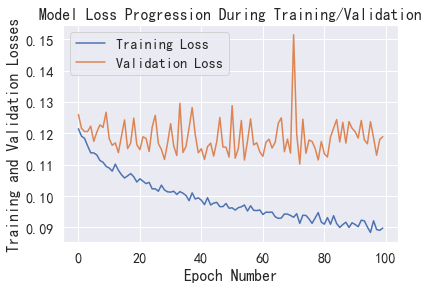

In [308]:
plt.plot(epochs_hist2.history['loss'])
plt.plot(epochs_hist2.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
3plt.legend(['Training Loss', 'Validation Loss'])

#### 还是选用XGBoost

In [312]:
import os
os.getcwd()

'E:\\dasein_py\\Data Analysis\\招商银行'

In [315]:
from src import * 
from tabnet import *

In [325]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

import os, sys, gc, warnings, random

import datetime
import dateutil.relativedelta

# Data manipulation
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
import sklearn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GroupKFold
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb

from tqdm.notebook import trange, tqdm

from IPython.display import display

%matplotlib inline

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100

In [339]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from pytorch_tabnet.pretraining import TabNetPretrainer
import torch

In [340]:
# clf = TabNetClassifier(
#     optimizer_fn=torch.optim.Adam,
#     optimizer_params=dict(lr=2e-2),
#     scheduler_params={"step_size":10, # how to use learning rate scheduler
#                       "gamma":0.9},
#     scheduler_fn=torch.optim.lr_scheduler.StepLR,
#     mask_type='sparsemax' # This will be overwritten if using pretrain model
# )

# clf.fit(
#     X_train=train[features].values, y_train=y,
#     eval_set= [(train[features].values, y)],
#     eval_name=['train'], #, 'valid'],
#     eval_metric=['auc'],
# )

In [ ]:
unsupervised_model = TabNetPretrainer(
    optimizer_fn = torch.optim.Adam,
    optimizer_params = dict(lr=2e-2),
    mask_type='sparsemax'
)

unsupervised_model.fit(
    x_train,
    pretraining_ratio=0.8,
)

Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 655.35333|  0:00:02s
epoch 1  | loss: 21.7875 |  0:00:04s
epoch 2  | loss: 1.22313 |  0:00:06s
epoch 3  | loss: 1.06856 |  0:00:09s
epoch 4  | loss: 1.04967 |  0:00:11s
epoch 5  | loss: 1.05247 |  0:00:14s
epoch 6  | loss: 1.05759 |  0:00:17s
epoch 7  | loss: 1.0549  |  0:00:19s
epoch 8  | loss: 1.05313 |  0:00:22s
epoch 9  | loss: 1.05237 |  0:00:25s
epoch 10 | loss: 1.04158 |  0:00:27s
epoch 11 | loss: 1.04043 |  0:00:30s
epoch 12 | loss: 1.04069 |  0:00:33s
epoch 13 | loss: 1.0711  |  0:00:35s
epoch 14 | loss: 1.02679 |  0:00:38s
epoch 15 | loss: 1.05723 |  0:00:41s
epoch 16 | loss: 1.03928 |  0:00:44s
epoch 17 | loss: 1.03073 |  0:00:46s
epoch 18 | loss: 1.02979 |  0:00:49s
epoch 19 | loss: 1.03282 |  0:00:52s
epoch 20 | loss: 1.02161 |  0:00:54s
epoch 21 | loss: 1.03161 |  0:00:57s
epoch 22 | loss: 1.02062 |  0:01:00s
epoch 23 | loss: 1.02879 |  0:01:03s
epoch 24 | loss: 1.0

In [ ]:
predict_proba3 = unsupervised_model.predict_proba(x_test)
predict_proba3

In [ ]:
predict_proba3 = tf.squeeze(predict_proba2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_proba2)
auc(false_positive_rate, true_positive_rate)